In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
sns.set()
import pickle
from sklearn.preprocessing import LabelEncoder
from autoimpute.imputations import SingleImputer,MultipleImputer

In [5]:
# Convert the 'features' data into a DataFrame
mushroom_df = pd.DataFrame(mushroom['data']['original'])

In [6]:
mushroom_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [46]:
mushroom_df.iloc[0]

cap-shape                   x
cap-surface                 s
cap-color                   n
bruises                     t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  k
stalk-shape                 e
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  s
habitat                     u
poisonous                   p
Name: 0, dtype: object

Data Description: This dataset describes mushrooms in terms of their physical characteristics. They are classified into: poisonous or edible.

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [7]:
mushroom_df['poisonous'].unique()

array(['p', 'e'], dtype=object)

In [8]:
mushroom_df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [9]:
mushroom_df.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [10]:
mushroom_df['stalk-root']

0         e
1         c
2         c
3         e
4         e
       ... 
8119    NaN
8120    NaN
8121    NaN
8122    NaN
8123    NaN
Name: stalk-root, Length: 8124, dtype: object

There are 2480 missing values in "stalk-root" column. Let's replace such values with numpy "nan" so that we can handle the missing values.

In [11]:
mushroom_df['stalk-root'] = mushroom_df['stalk-root'].replace('NaN',np.nan)

Great! now we can see the missing values in the stalk-root column. we will impute these missing values.





In [12]:
for column in mushroom_df.columns:
    print(column,mushroom_df[column].nunique())    

cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 4
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7
poisonous 2


Notice that "veil-type" column has only one unique category. This column won't give much information ,so let's drop it.

In [13]:
mushroom_df = mushroom_df.drop(['veil-type'],axis=1)

We will start with imputing the missing values. We will use "autoImputer" package. It provides various techniques to impute missing values. We will use Single Imputer here.

In [5]:
pip install autoimpute

Note: you may need to restart the kernel to use updated packages.


In [14]:
mushroom_df['stalk-root'] = mushroom_df['stalk-root'].astype('category')

In [15]:
impute = SingleImputer(strategy='categorical')

In [16]:
impute.fit(mushroom_df)

SingleImputer(strategy='categorical')

In [17]:
new_data =impute.transform(mushroom_df)

In [18]:
new_data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,w,o,e,w,v,l,p


In [19]:
new_data.dtypes

cap-shape                     object
cap-surface                   object
cap-color                     object
bruises                       object
odor                          object
gill-attachment               object
gill-spacing                  object
gill-size                     object
gill-color                    object
stalk-shape                   object
stalk-root                  category
stalk-surface-above-ring      object
stalk-surface-below-ring      object
stalk-color-above-ring        object
stalk-color-below-ring        object
veil-color                    object
ring-number                   object
ring-type                     object
spore-print-color             object
population                    object
habitat                       object
poisonous                     object
dtype: object

In [20]:
new_data["stalk-root"].unique()

['e', 'c', 'b', 'r']
Categories (4, object): ['b', 'c', 'e', 'r']

<Axes: xlabel='stalk-root', ylabel='count'>

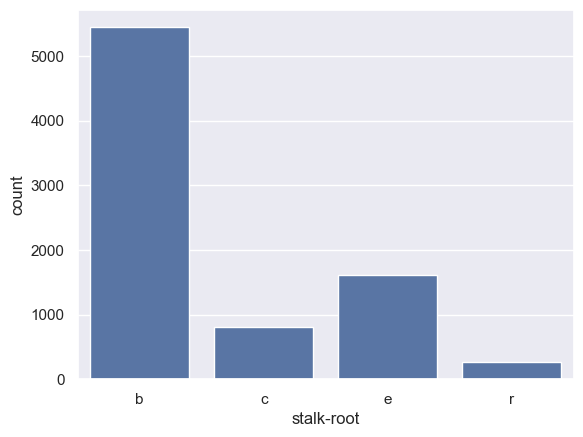

In [21]:
sns.countplot(data=new_data, x='stalk-root')

In [22]:
new_data.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
poisonous                   0
dtype: int64

The missing values have been imputed and there are no missing values now.

Let's move ahead and encode our categorical values.

let's check the number of unique caegories each column has.

In [23]:
for column in new_data.columns:
    print(column,new_data[column].nunique())

cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 4
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7
poisonous 2


We will map columns "poisonous". we are mapping poisonous column, so we can easily return the actual value during prediction.
We will use get dumies for rest of the columns.

In [24]:
new_data["poisonous"] = new_data["poisonous"].map({"p" : 0, "e" : 1})

In [25]:
for column in new_data.drop(['poisonous'],axis=1).columns:
    new_data = pd.get_dummies(new_data, columns=[column], drop_first=True)

In [26]:
new_data

,poisonous,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,1,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,1,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,0,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,1,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,1,False,False,False,False,True,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,1,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,0,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False


In [27]:
len(new_data.columns)

95

As expected, the number of columns have increased because of get dummies.

let's move ahead and check how balanced our data is:

<Axes: xlabel='poisonous', ylabel='count'>

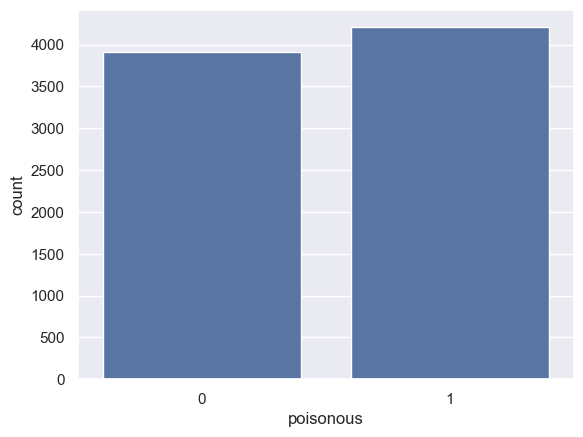

In [28]:
sns.countplot(data=new_data, x='poisonous')

our dataset looks pretty balanced. So we are good to go with starting our model training!!!

# Model Training

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
from sklearn.metrics import roc_auc_score, accuracy_score

In [30]:
X = new_data.drop(columns=['poisonous'])
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [31]:
y = new_data['poisonous']
y

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: poisonous, Length: 8124, dtype: int64

In [32]:
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.20,random_state=30)

In [33]:
clf = RandomForestClassifier()

### Hyperparameter tuning

In [34]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 4, 1), "max_features": ['sqrt', 'log2']}

In [35]:
grid = GridSearchCV(estimator=clf,param_grid=param_grid,cv=5,verbose=3)

In [36]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10;, score=0.934 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10;, score=0.948 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10;, score=0.916 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10;, score=0.978 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10;, score=0.937 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=50;, score=0.929 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=50;, score=0.928 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=50;, score=0.921 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqr

[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=100;, score=0.952 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.942 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.937 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.959 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.939 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.952 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=10;, score=0.885 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=10;, score=0.901 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=10;, score=0.912 total time=   

[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.937 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.948 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.978 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.945 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.935 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.954 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.938 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.941 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=130;, score=0.

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 4),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 130]},
             verbose=3)

In [37]:
#extracting the best parameters
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 130}

In [38]:
#creating a new model with the best parameters
random_forest = RandomForestClassifier(criterion='entropy',max_depth=3,max_features='sqrt',n_estimators=130)

In [39]:
# create best model for Random Forest
random_forest.fit(train_x,train_y)

RandomForestClassifier(max_depth=3, n_estimators=130)

In [40]:
# prediction using the Random Forest Algorithm
prediction_random_forest = random_forest.predict(test_x)
prediction_random_forest

array([1, 1, 1, ..., 0, 1, 0])

In [41]:
# Accuracy test
# AUC for Random Forest
random_forest_score = roc_auc_score((test_y), prediction_random_forest) 
print('AUC for RF:' + str(random_forest_score))

AUC for RF:0.9832439678284182


In [42]:
# Saving the trained model
# Before any operation on the file, first we have to open the file
# wb means write into file in binary mode
# with statement ensures that the file is closed after execution of code inside the block
with open("trained_model.pickle", "wb") as file:
    pickle.dump(random_forest, file)

In [43]:
#Export new dataframe to csv file
new_data.to_csv("New_dataset/new_data.csv")